# <h1 style='background:#4682B4; border:2; border-radius: 10px; font-size:250%; font-weight: bold; color:black'><center>Personal Key Indicators of Heart Disease</center></h1>

<img src = "https://i.gifer.com/1mT3.gif" width = 900 height = 400/>

Heart disease (heart disease) is a group of diseases related to cardiovascular diseases, manifested by a violation of the normal functioning of the heart. May be caused by damage to the epicardium, pericardium, myocardium, endocardium, valvular apparatus of the heart, heart vessels.

Heart disease can last a long time in a latent form, clinically not manifesting itself. Along with various tumors, these diseases are today the main cause of premature death in developed countries.

The uninterrupted operation of the circulatory system, which consists of the heart as a muscle pump and a network of blood vessels, is a necessary condition for the normal functioning of the body.

According to the National Heart, Lung and Blood Institute in Framingham (USA), the most important factors in the development of cardiovascular disease in humans are obesity, sedentary lifestyle and smoking.

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#4682B4; border:0; border-radius: 10px; color:black'><center> TABLE OF CONTENTS </center></h1>

### [**1. IMPORTING LIBRARIES AND LOADING DATA**](#title-one)

### [**2. DATA INFORMATION**](#title-two)

### [**3. EXPLORATORY DATA ANALYSIS**](#title-three)
    
### [**4. STATISTICAL TESTS**](#title-four)
    
### [**5. MACHINE LEARNING**](#title-five)

### [**6. RECOMENDATIONS**](#title-six)
    
<a id="title-one"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:black'><center>IMPORTING LIBRARIES AND LOADING DATA</center></h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import missingno as msno
from scipy import stats

In [2]:
train = pd.read_csv('../content/heart_2020_cleaned.csv')

<a id="title-two"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:black'><center>DATA INFORMATION</center></h1>

Get a basic description of numeric data

In [3]:
train.describe().style.background_gradient(cmap = "summer")

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325399,3.371710,3.898366,7.097075
std,6.356100,7.950850,7.955235,1.436007
min,12.020000,0.000000,0.000000,1.000000
25%,24.030000,0.000000,0.000000,6.000000
50%,27.340000,0.000000,0.000000,7.000000
75%,31.420000,2.000000,3.000000,8.000000
max,94.850000,30.000000,30.000000,24.000000


Hypothesis: There are outliers in the data for both maximum and minimum values.

Let's look at the data

In [4]:
train

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


The data sample is very informative and is represented by 319 thousand patients on 18 criteria.

What features characterize our data sample?

* HeartDisease - target trait.
* BMI - a value that allows you to assess the degree of correspondence between a person's mass and his height, and thereby indirectly judge whether the mass is insufficient, normal or excessive. It is important in determining the indications for the need for treatment.
* Smoking is a major risk factor for cardiovascular disease. When smoke from a cigarette is inhaled, the reaction of the cardiovascular system immediately follows: within one minute, the heart rate begins to rise, increasing by 30% within ten minutes of smoking. The bad habit also increases blood pressure, fibrinogen and platelet levels, making blood clots more likely.
* AlcoholDrinking - alcohol causes not only temporary disturbances in the functioning of the heart, but also permanent ones. Heart pain after alcohol is not the only health problem associated with alcohol consumption.
* Stroke - Ischemic stroke occurs 4 times more often than hemorrhagic. One of the leading causes of this suffering is heart disease, which impairs its functioning, as a result of which the blood flow in the arteries is disturbed and the blood supply to the brain is reduced. Another cause of stroke in heart disease is thromboembolism, when clots form in the cavities of the heart (most often with heart failure) - blood clots.
* PhysicalHealth - how many days in a month did you feel poor physical health.
* MentalHealth - how many days in a month did you feel poor mental health.
* DiffWalking - difficulty climbing stairs.
* Sex - gender of a person.
* AgeCategory - age category of the subjects.
*Race-obviously:)
* Diabetic - obviously :)
* PhysicalActivity - adults who reported doing physical activity or exercise during the past 30 days other than their regular job
* GenHealth - well-being.
* SleepTime - number of hours of sleep.
* Asthma- obviously :)
* KidneyDisease - obviously :)
* Skin Cancer - obviously :)

<a id="title-three"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:black'><center>EXPLORATORY DATA ANALYSIS</center></h1>

Check the dataset for gaps in the data

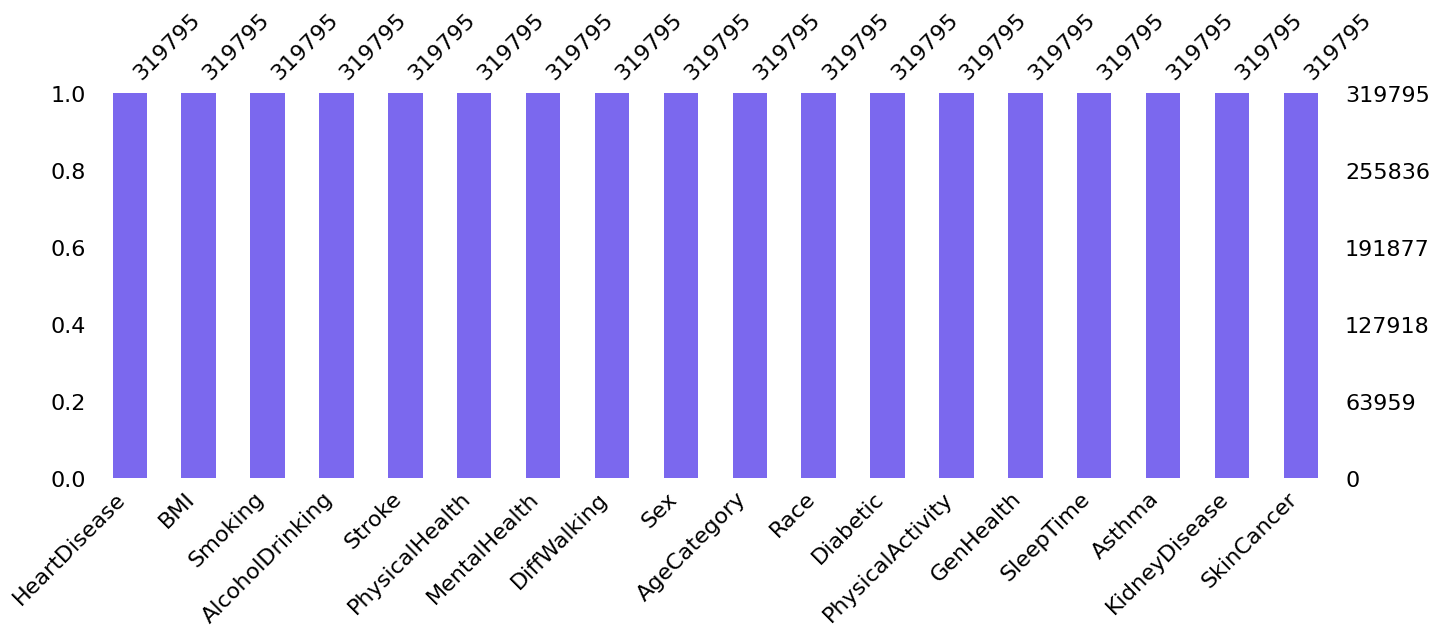

In [5]:
msno.bar(train, figsize = (16,5),color = "#7B68EE")
plt.show()

There are no missing values!

Let's look at the distribution of the target variable

<ipython-input-6-02f0bd20c2d3>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HeartDisease',data=train,palette='pastel');


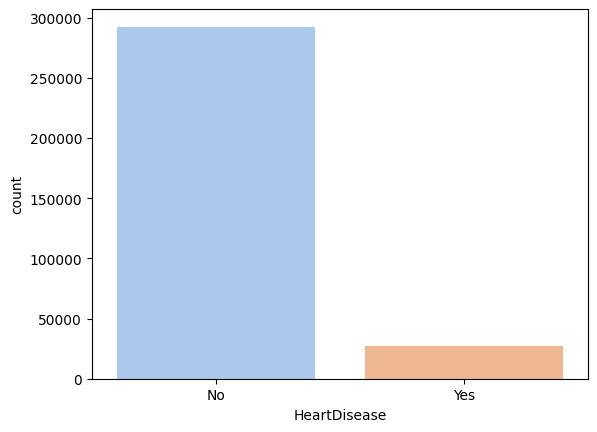

In [6]:
sns.countplot(x='HeartDisease',data=train,palette='pastel');


We are dealing with an unbalanced sample, where the majority of people are healthy.

Let's look at unique values in categorical objects

In [7]:
for column_name in train.columns:
    unique_values = len(train[column_name].unique())
    print("Feature '{column_name}' has '{unique_values}' unique values".format(column_name = column_name,
                                                                                         unique_values=unique_values))

Feature 'HeartDisease' has '2' unique values
Feature 'BMI' has '3604' unique values
Feature 'Smoking' has '2' unique values
Feature 'AlcoholDrinking' has '2' unique values
Feature 'Stroke' has '2' unique values
Feature 'PhysicalHealth' has '31' unique values
Feature 'MentalHealth' has '31' unique values
Feature 'DiffWalking' has '2' unique values
Feature 'Sex' has '2' unique values
Feature 'AgeCategory' has '13' unique values
Feature 'Race' has '6' unique values
Feature 'Diabetic' has '4' unique values
Feature 'PhysicalActivity' has '2' unique values
Feature 'GenHealth' has '5' unique values
Feature 'SleepTime' has '24' unique values
Feature 'Asthma' has '2' unique values
Feature 'KidneyDisease' has '2' unique values
Feature 'SkinCancer' has '2' unique values


Numeric variables are BMI, PhysicalHealth, MentalHealth, SleepTime. The rest are categorical.

In [8]:
train.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [9]:
numeric_features=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

Let's analyze numerical variables.

Text(0.5, 0.98, 'Visualizing continuous columns (train dataset)')

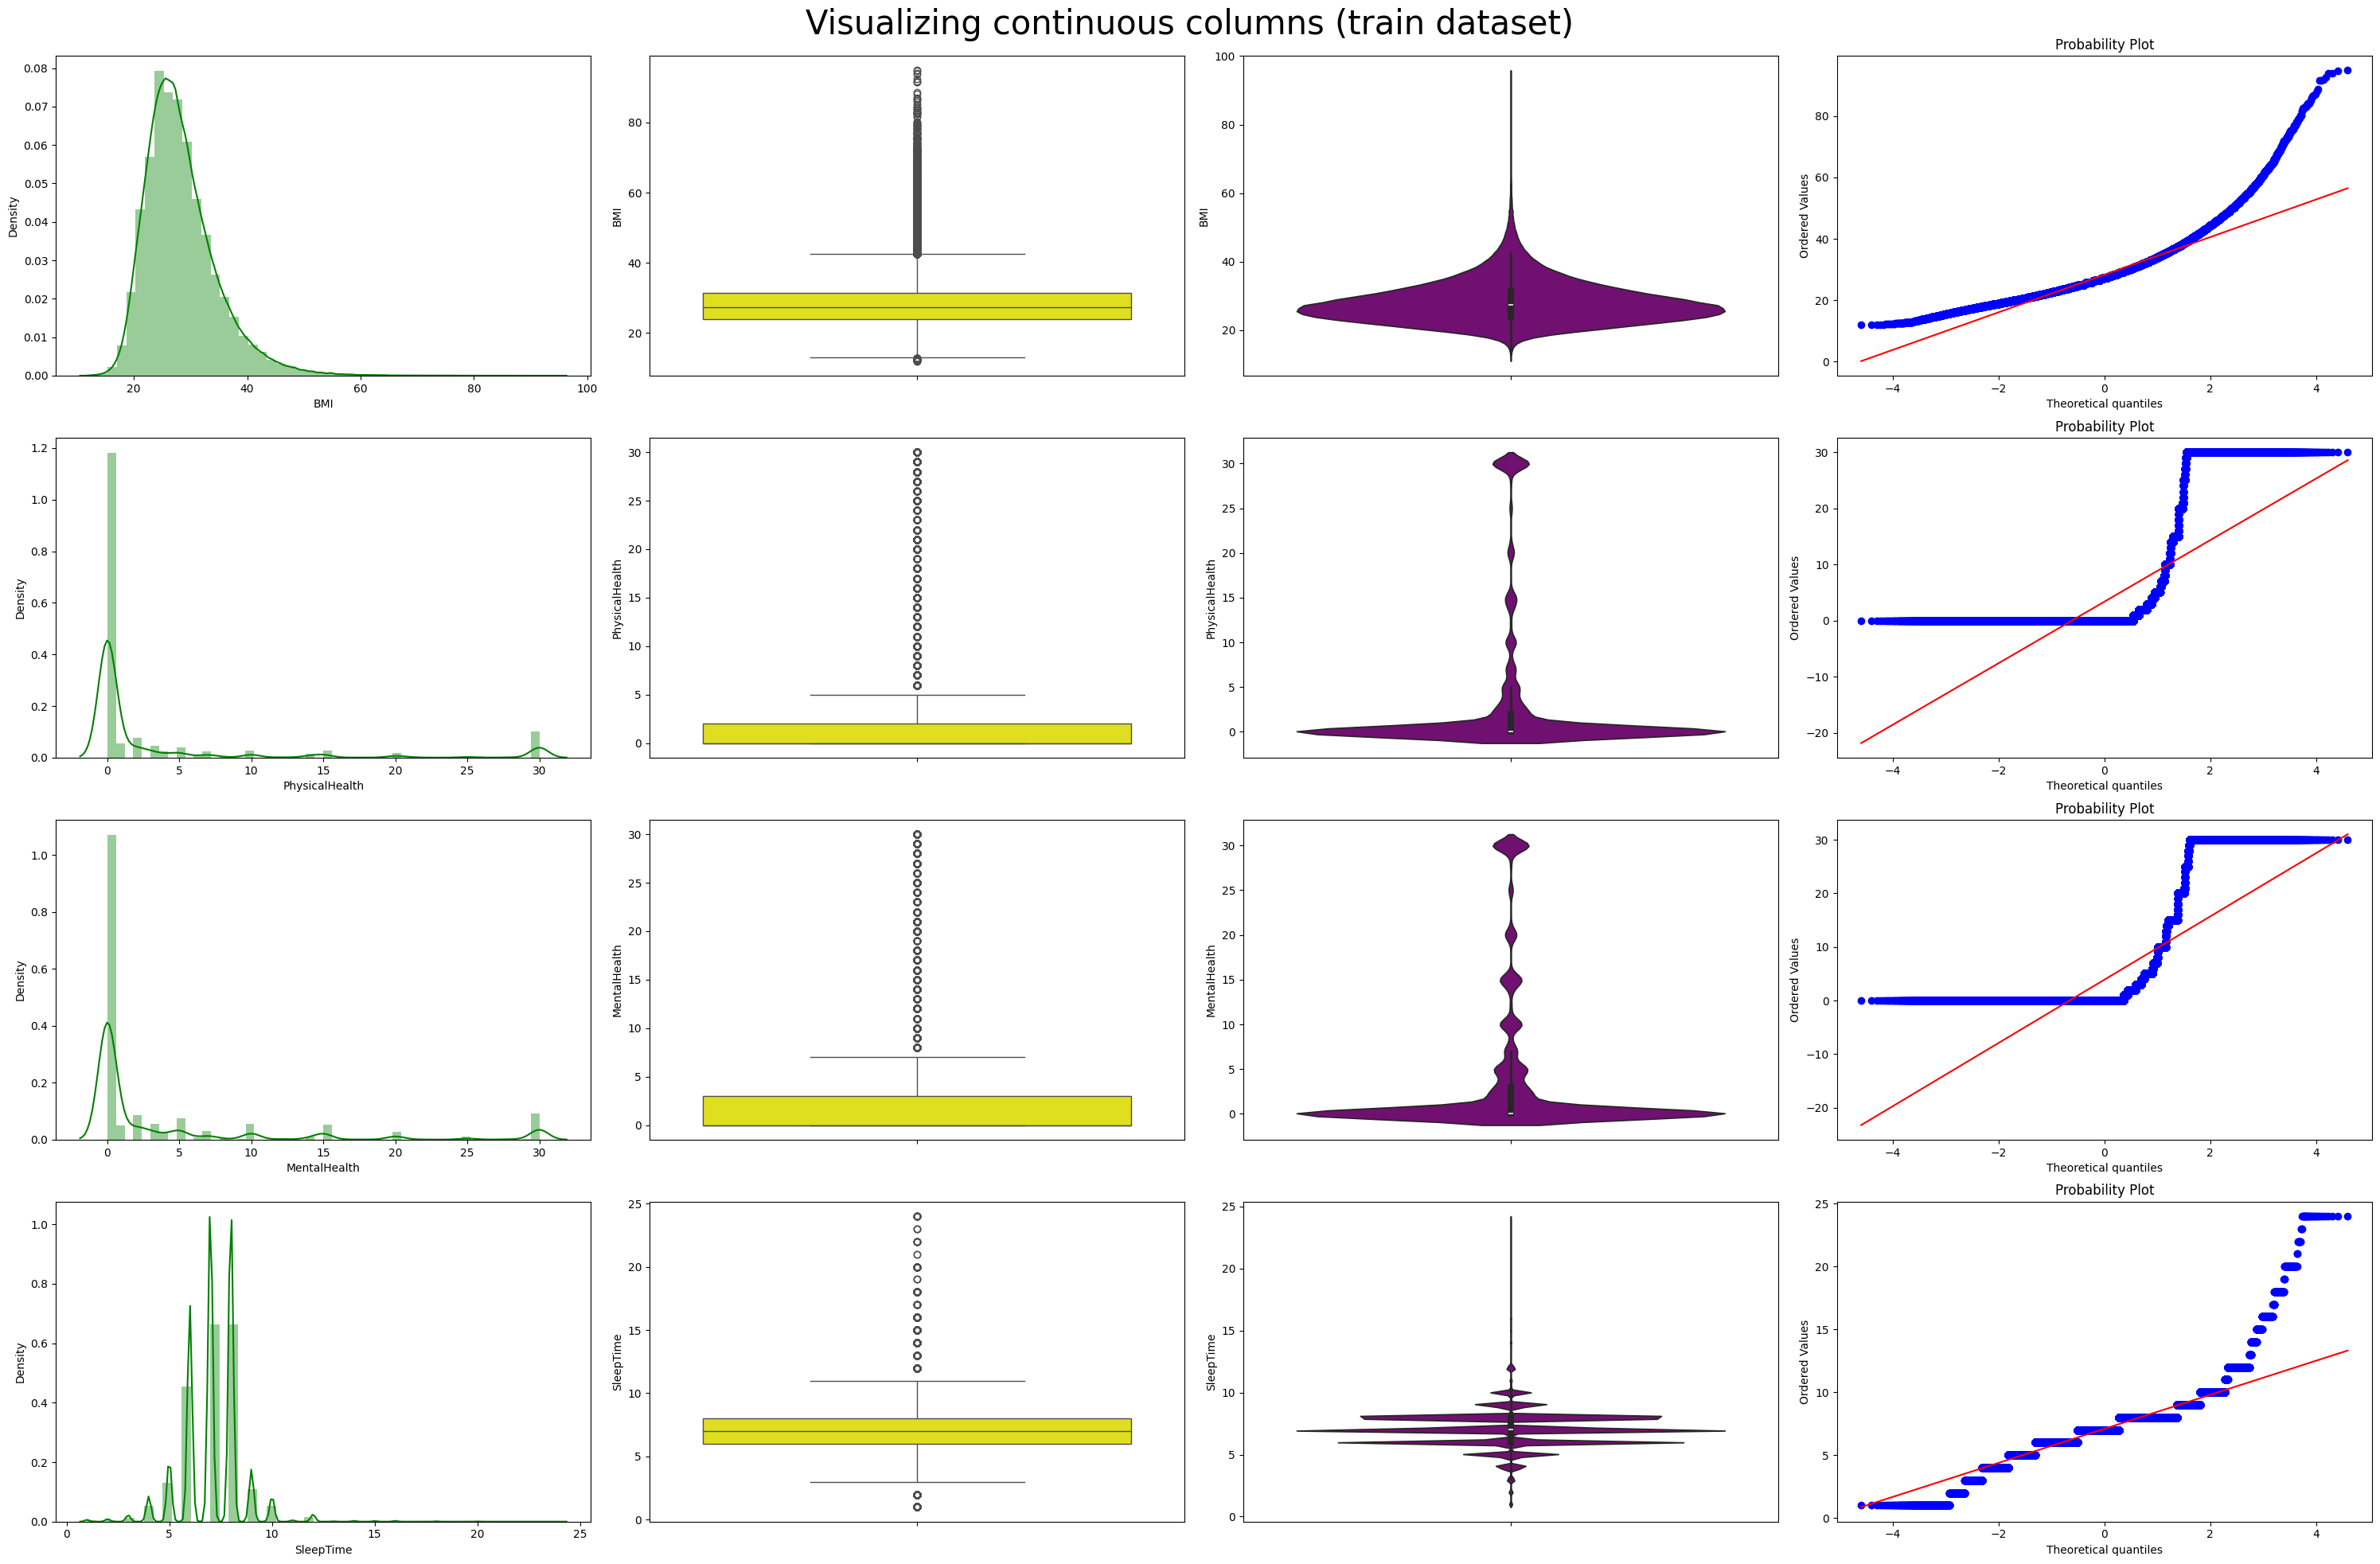

In [10]:
import warnings
warnings.filterwarnings('ignore')
fig,ax = plt.subplots(len(numeric_features),4,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sns.distplot(train[i],ax=ax[index,0],color='green')
    sns.boxplot(train[i],ax=ax[index,1],color='yellow')
    sns.violinplot(train[i],ax=ax[index,2],color='purple')
    stats.probplot(train[i],plot=ax[index,3])

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.suptitle("Visualizing continuous columns (train dataset)",fontsize=30)

The analysis showed that only the BMI variable is close to the normal distribution, the rest are close to bimodal.

Let's look at the distribution of the number of people with heart disease from various factors

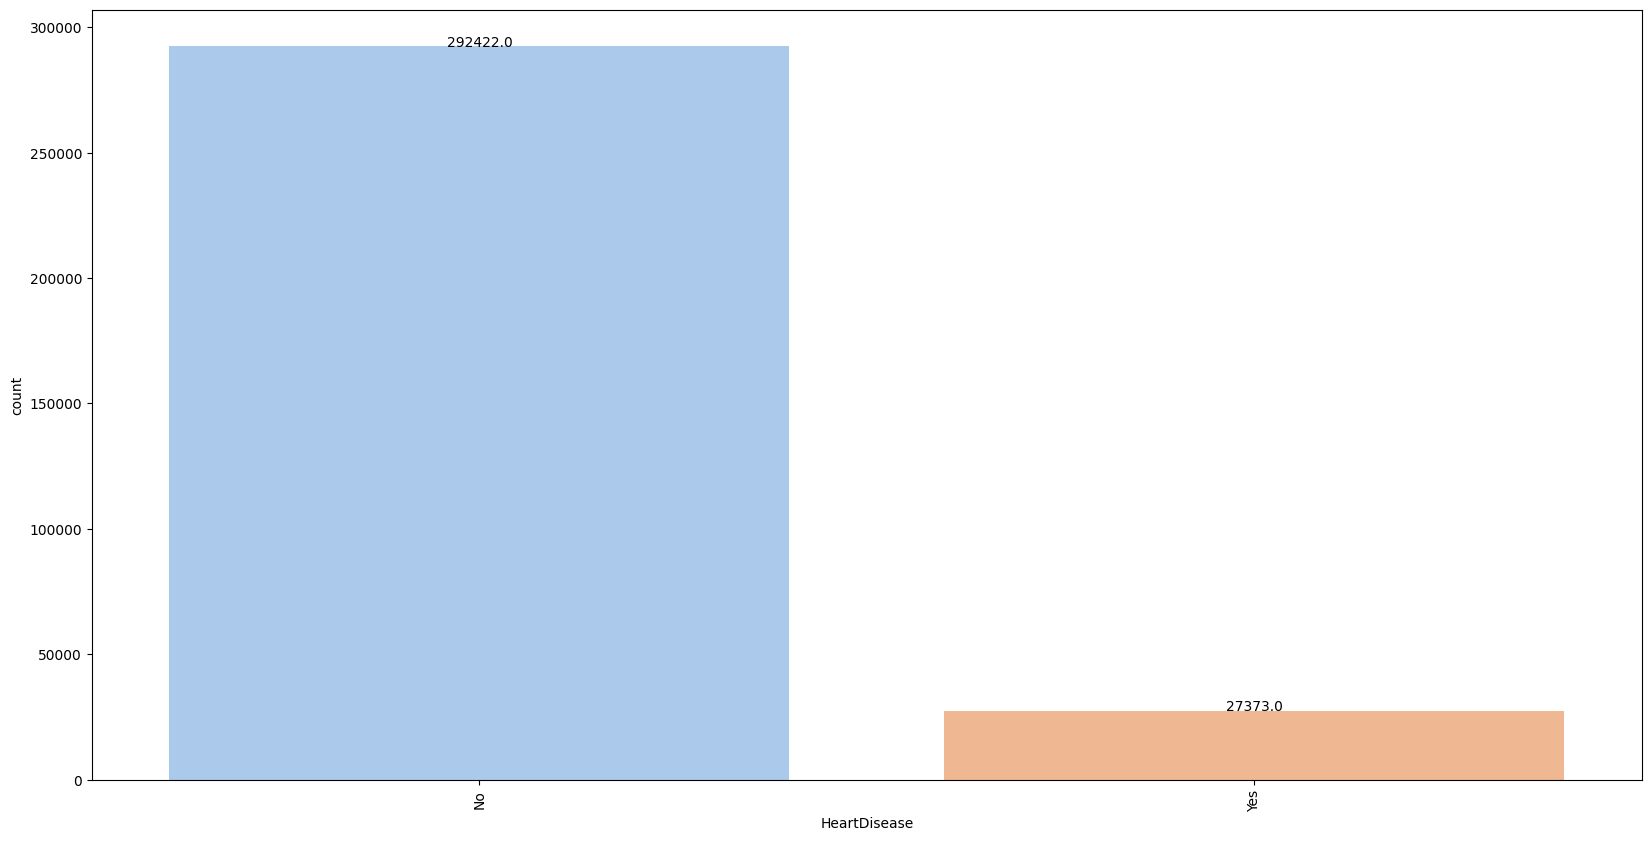

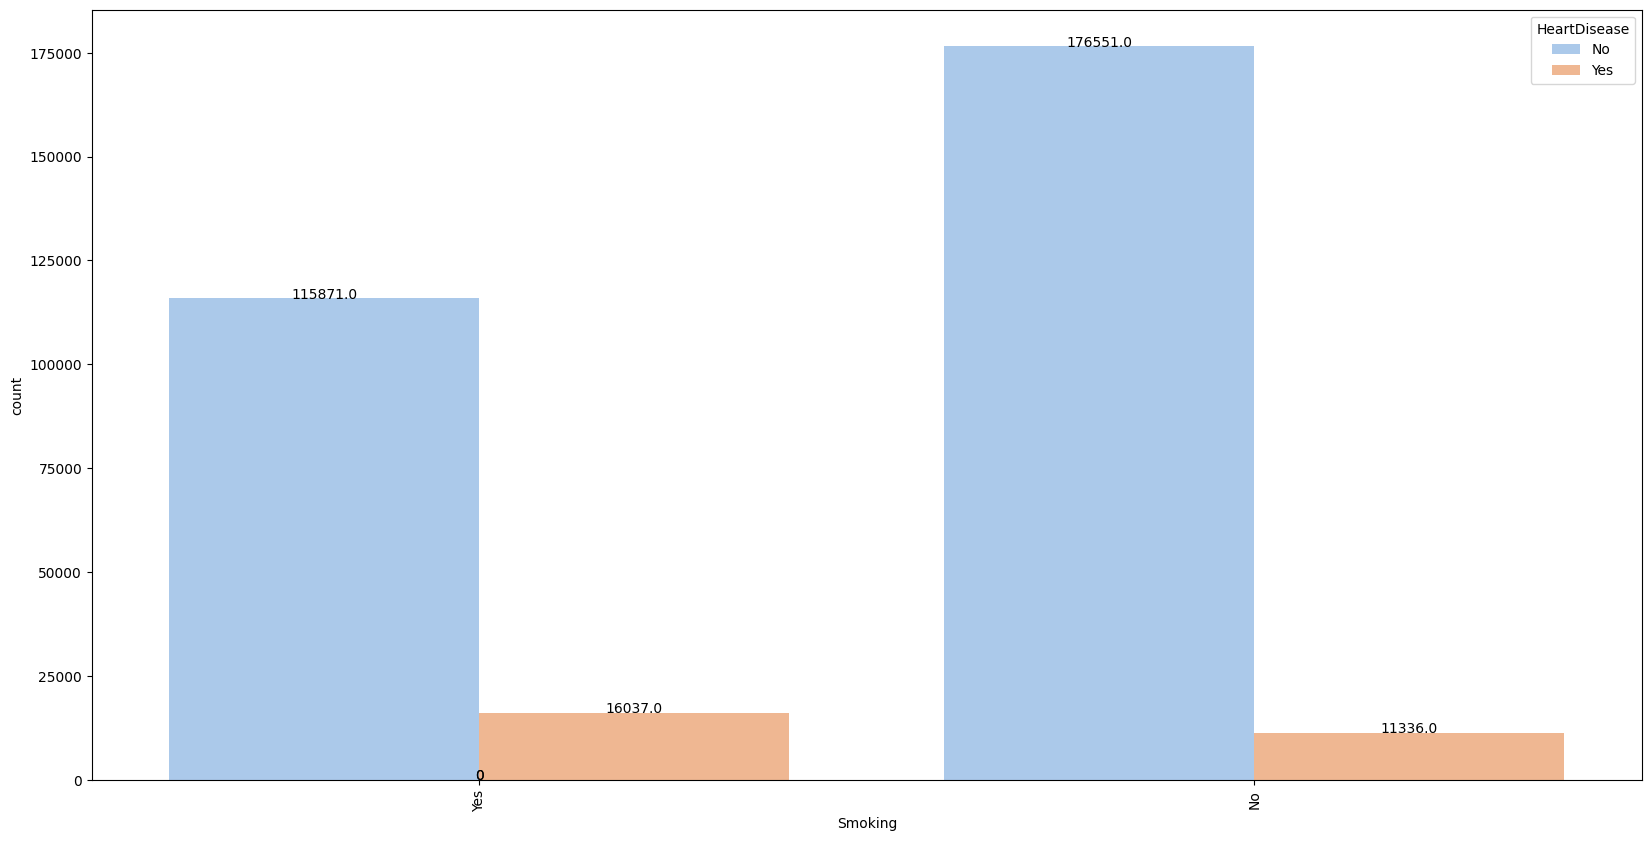

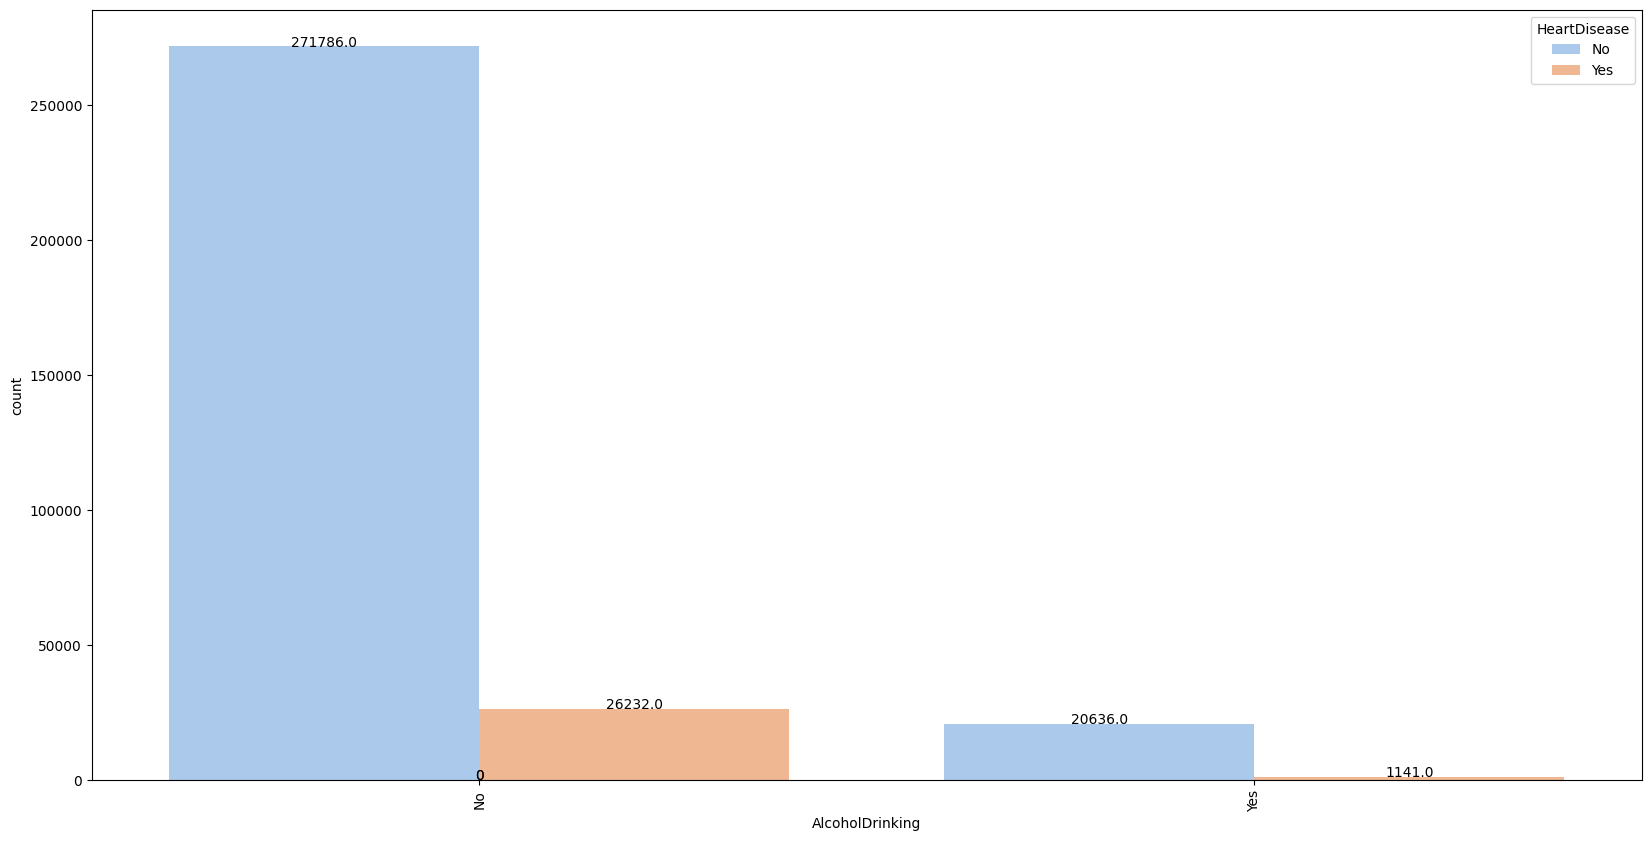

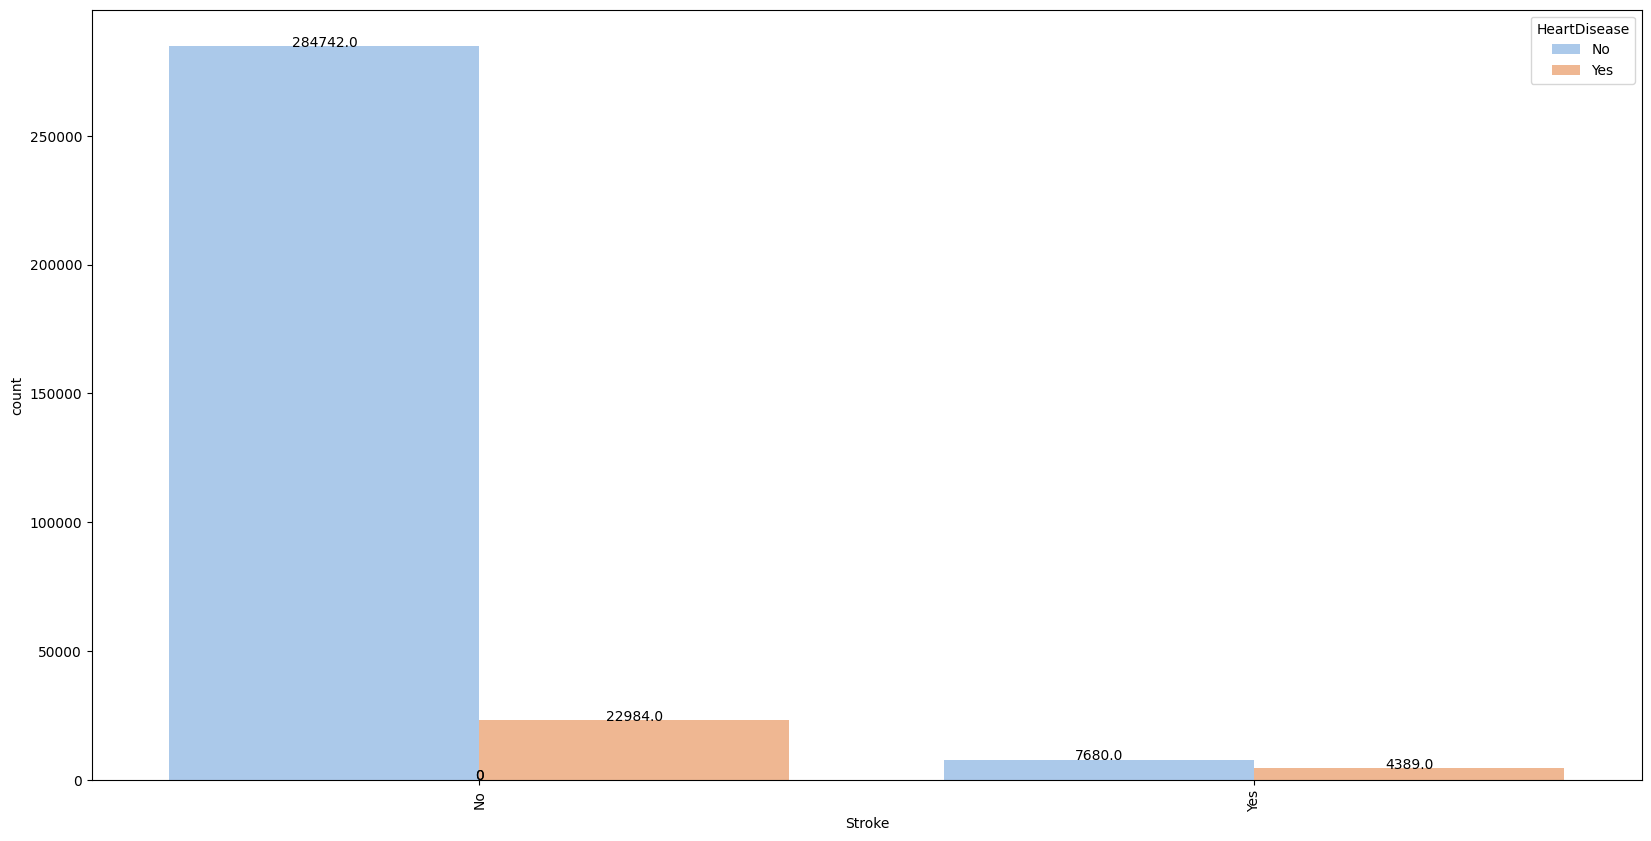

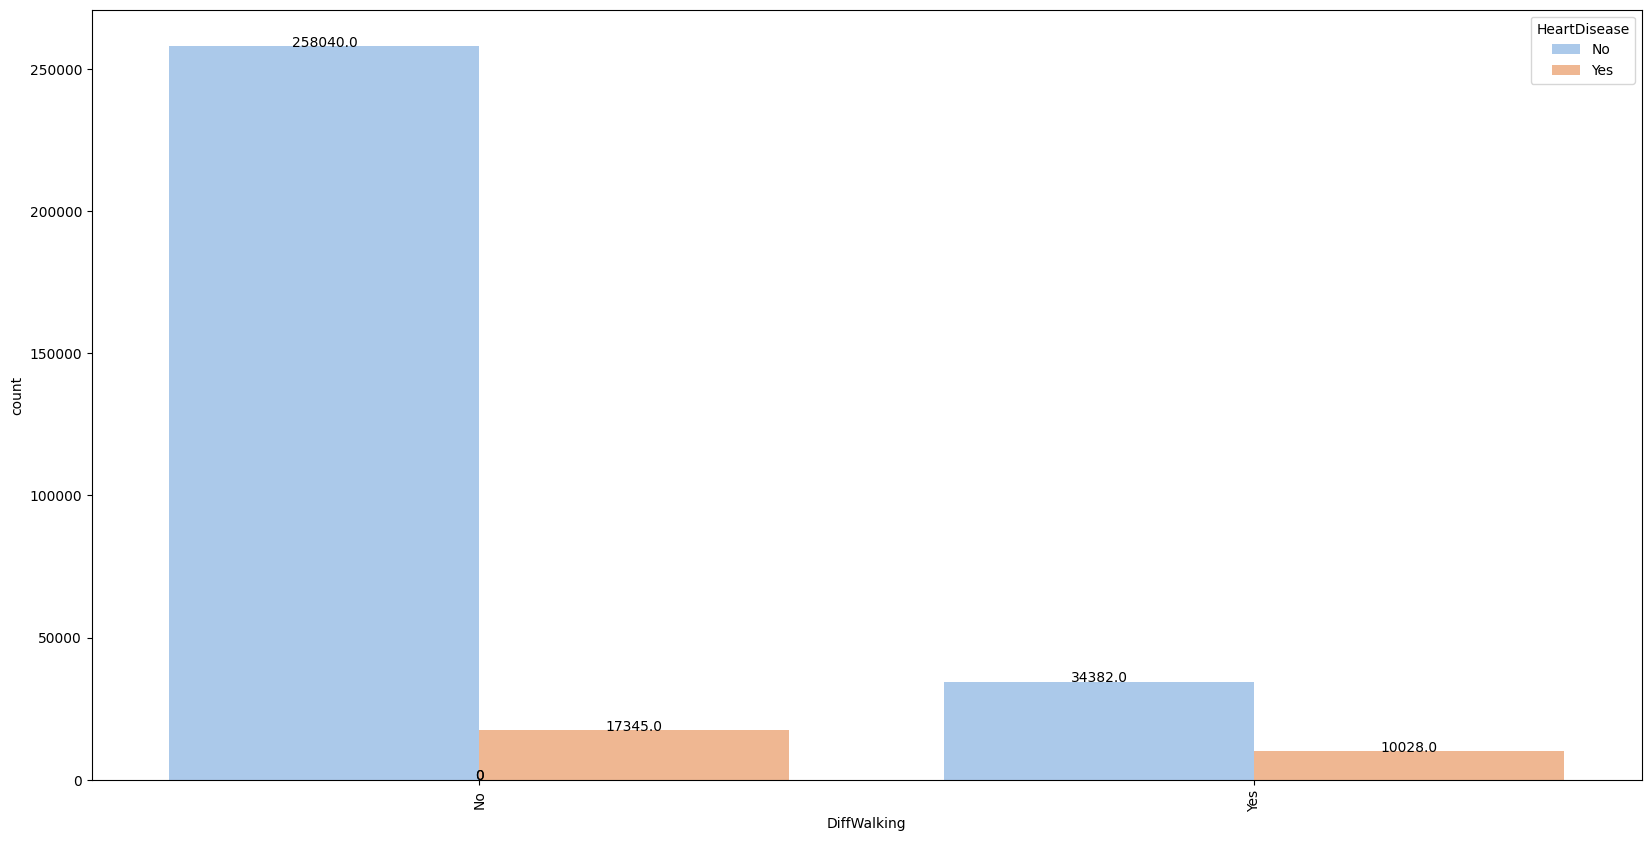

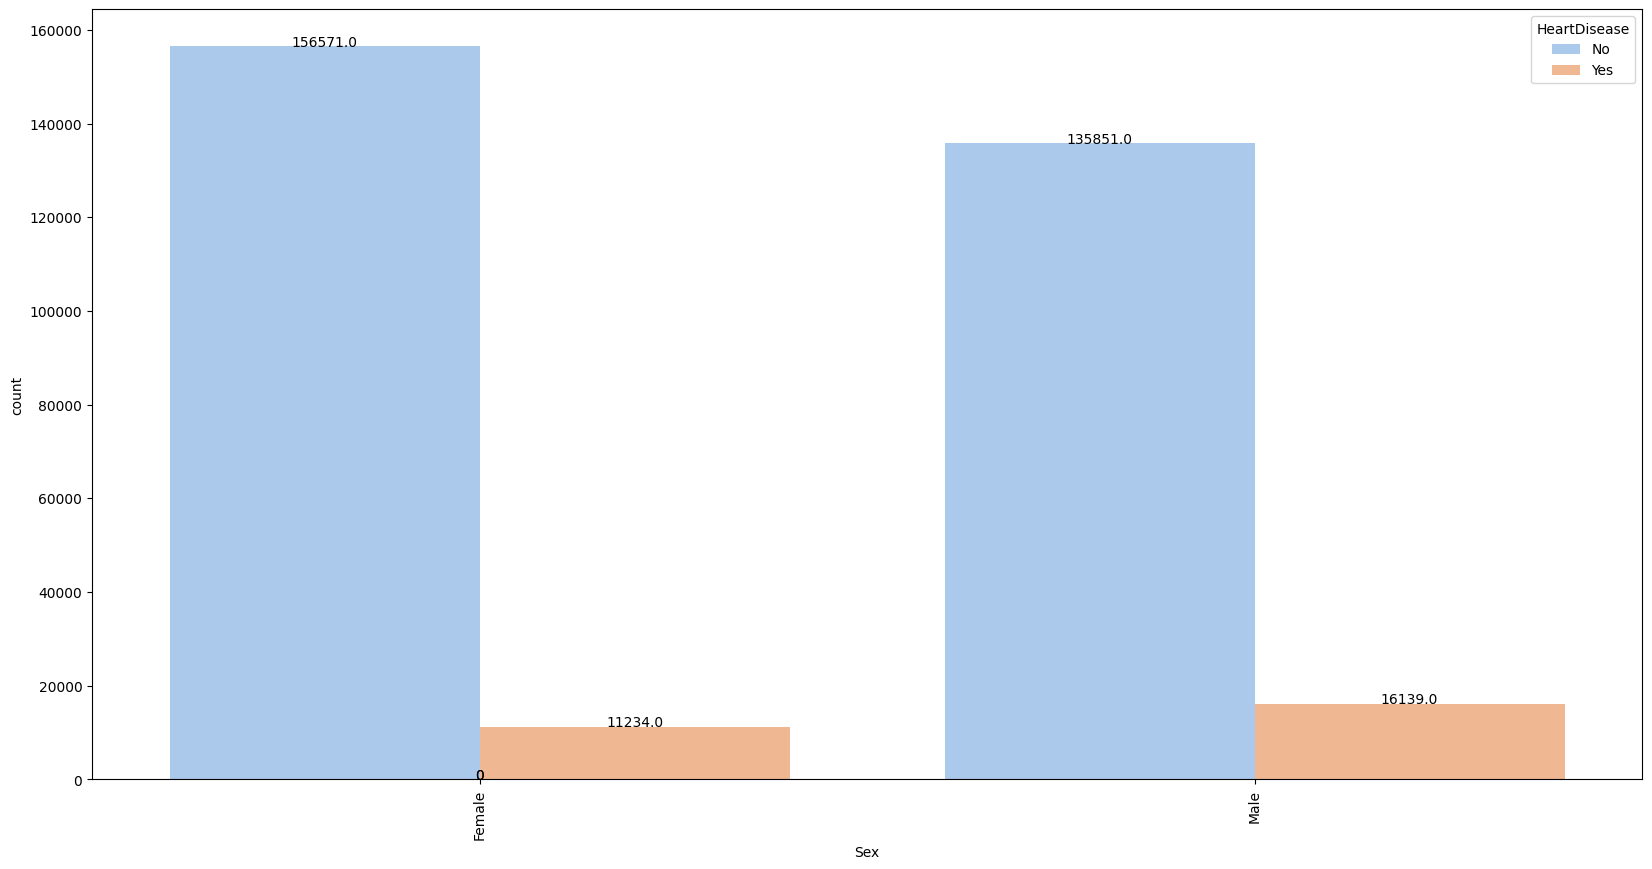

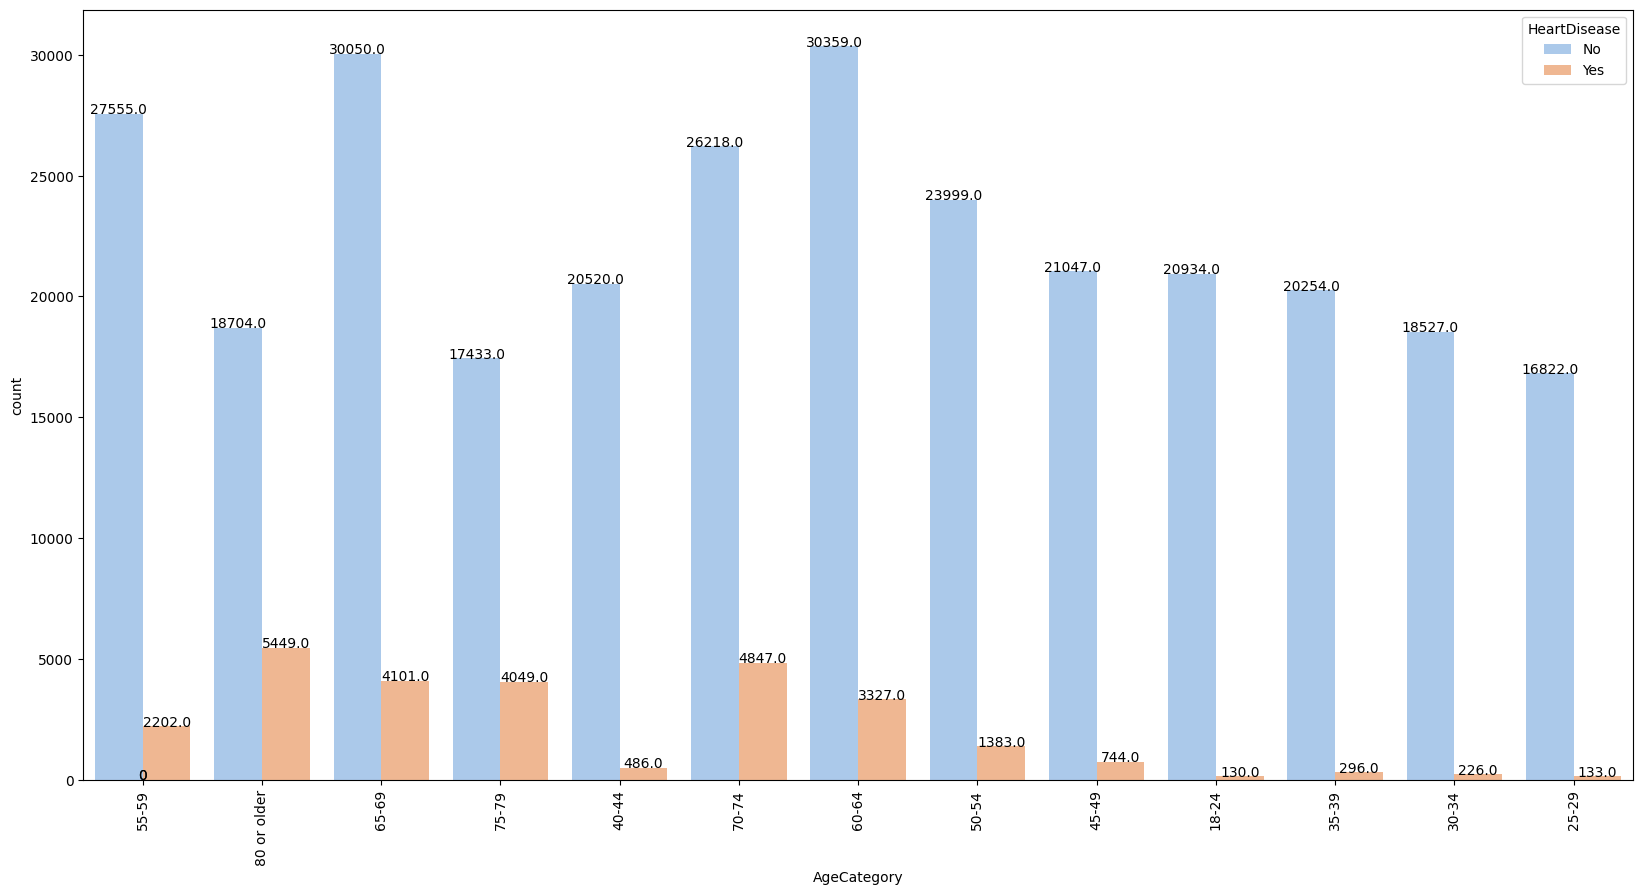

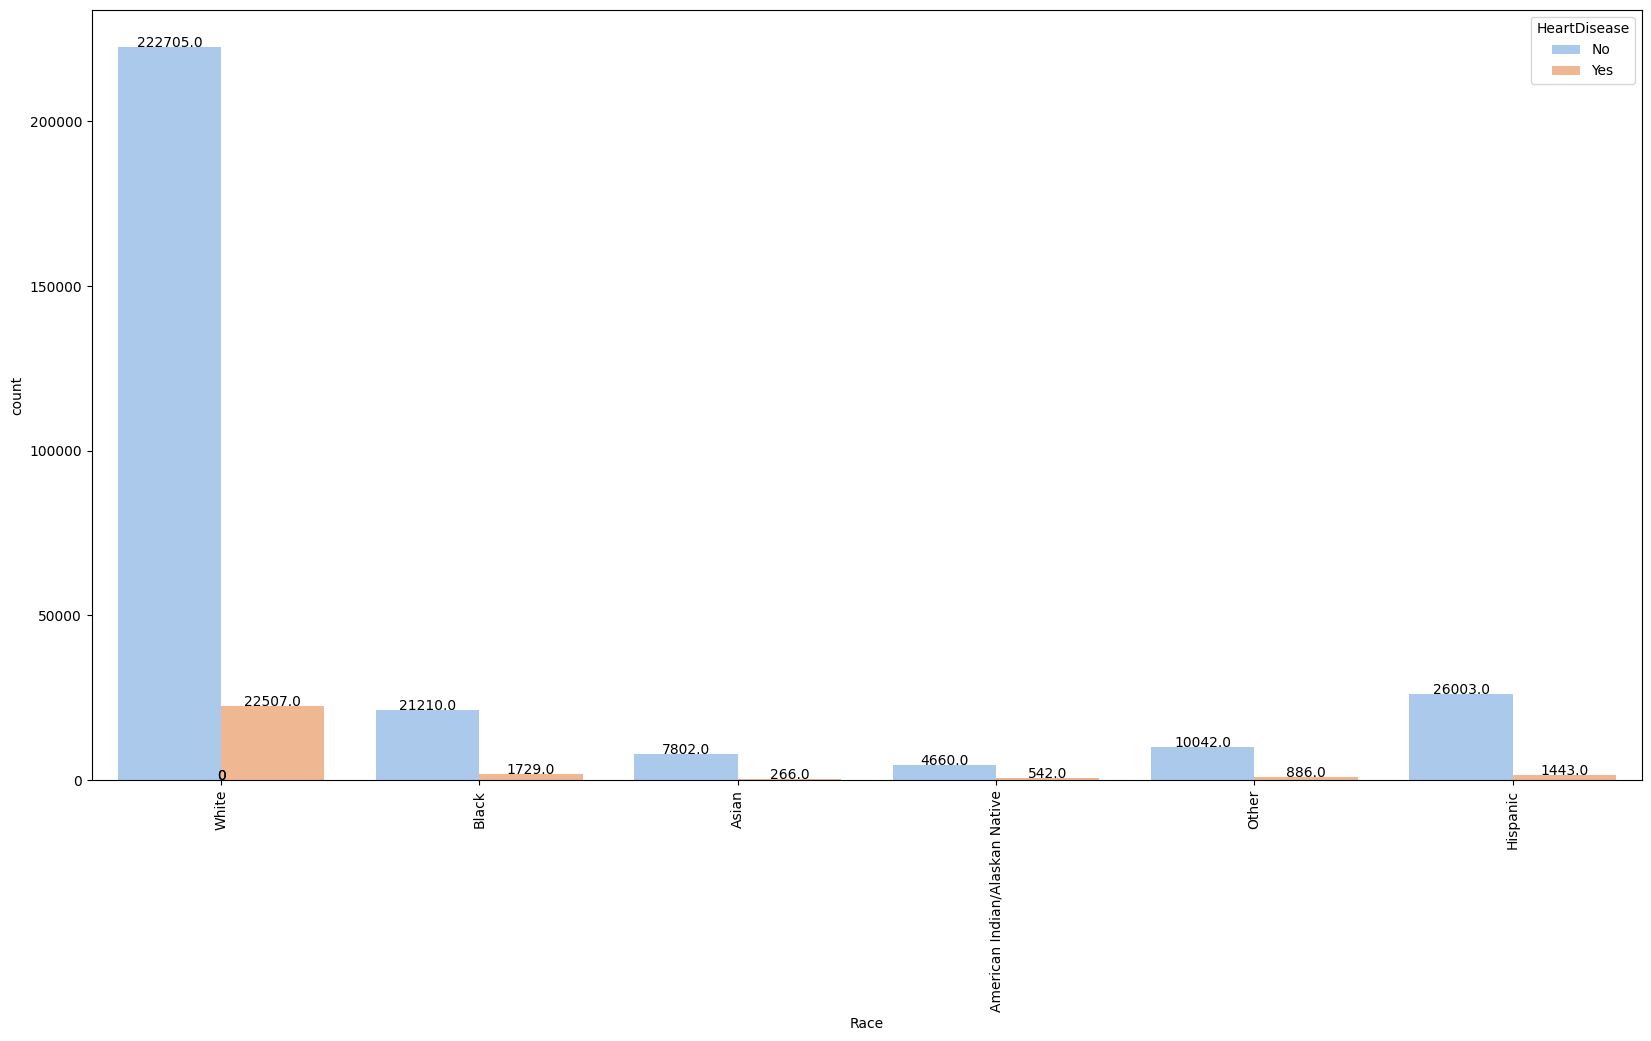

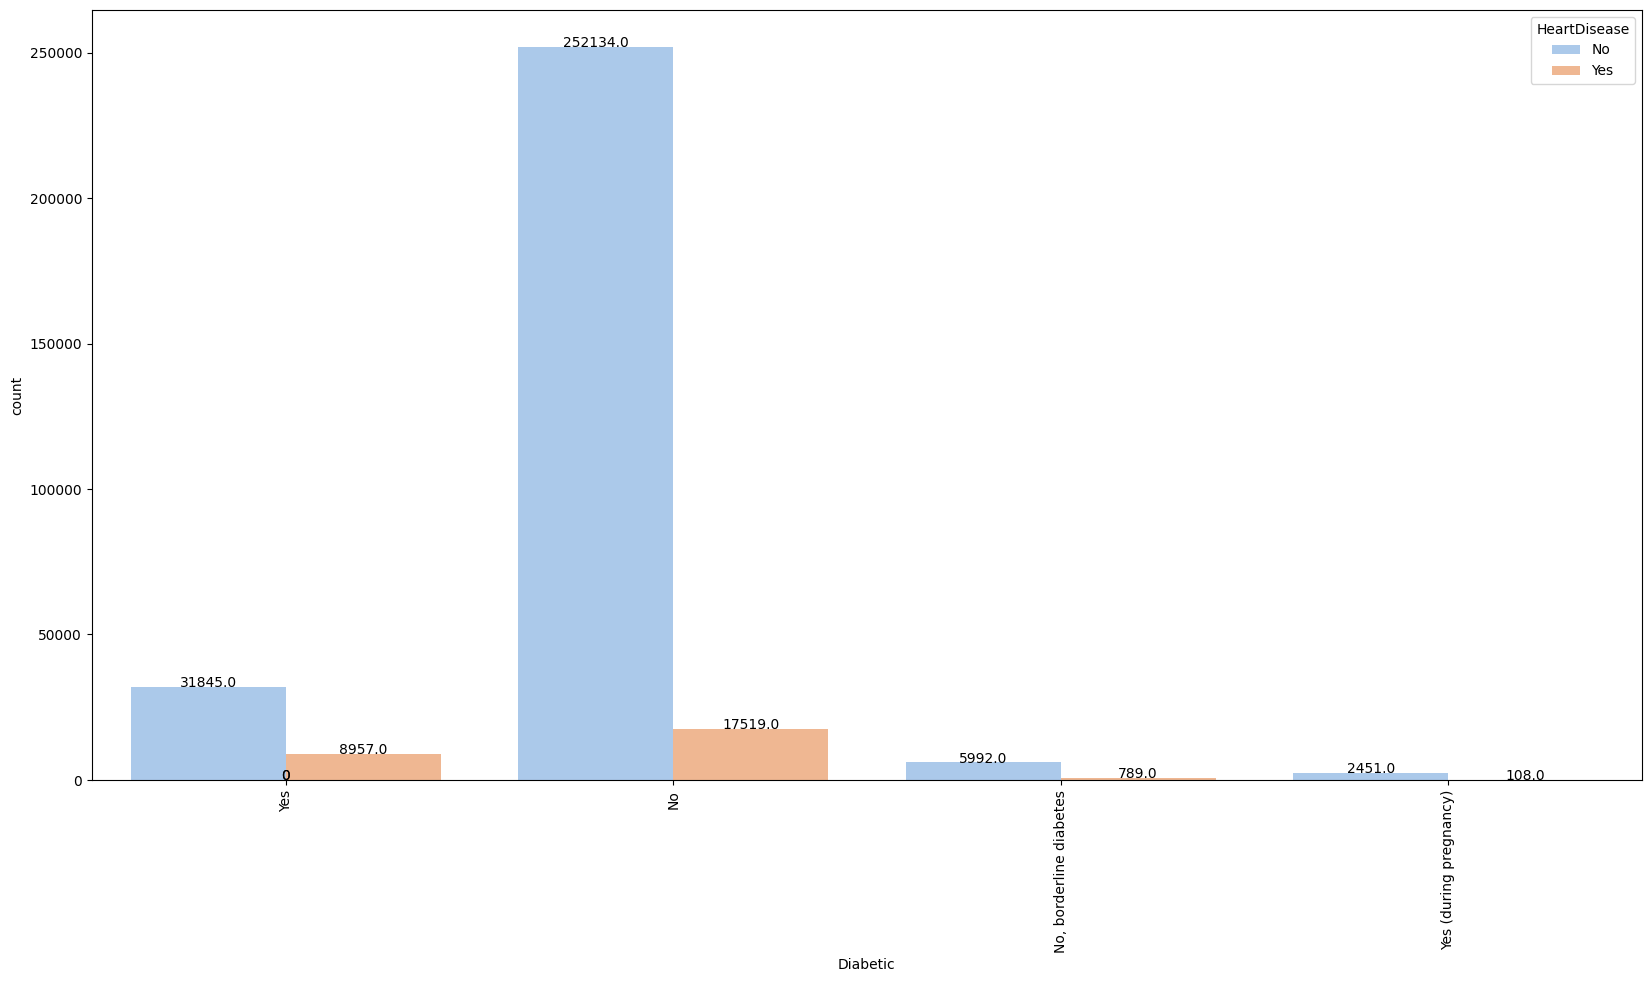

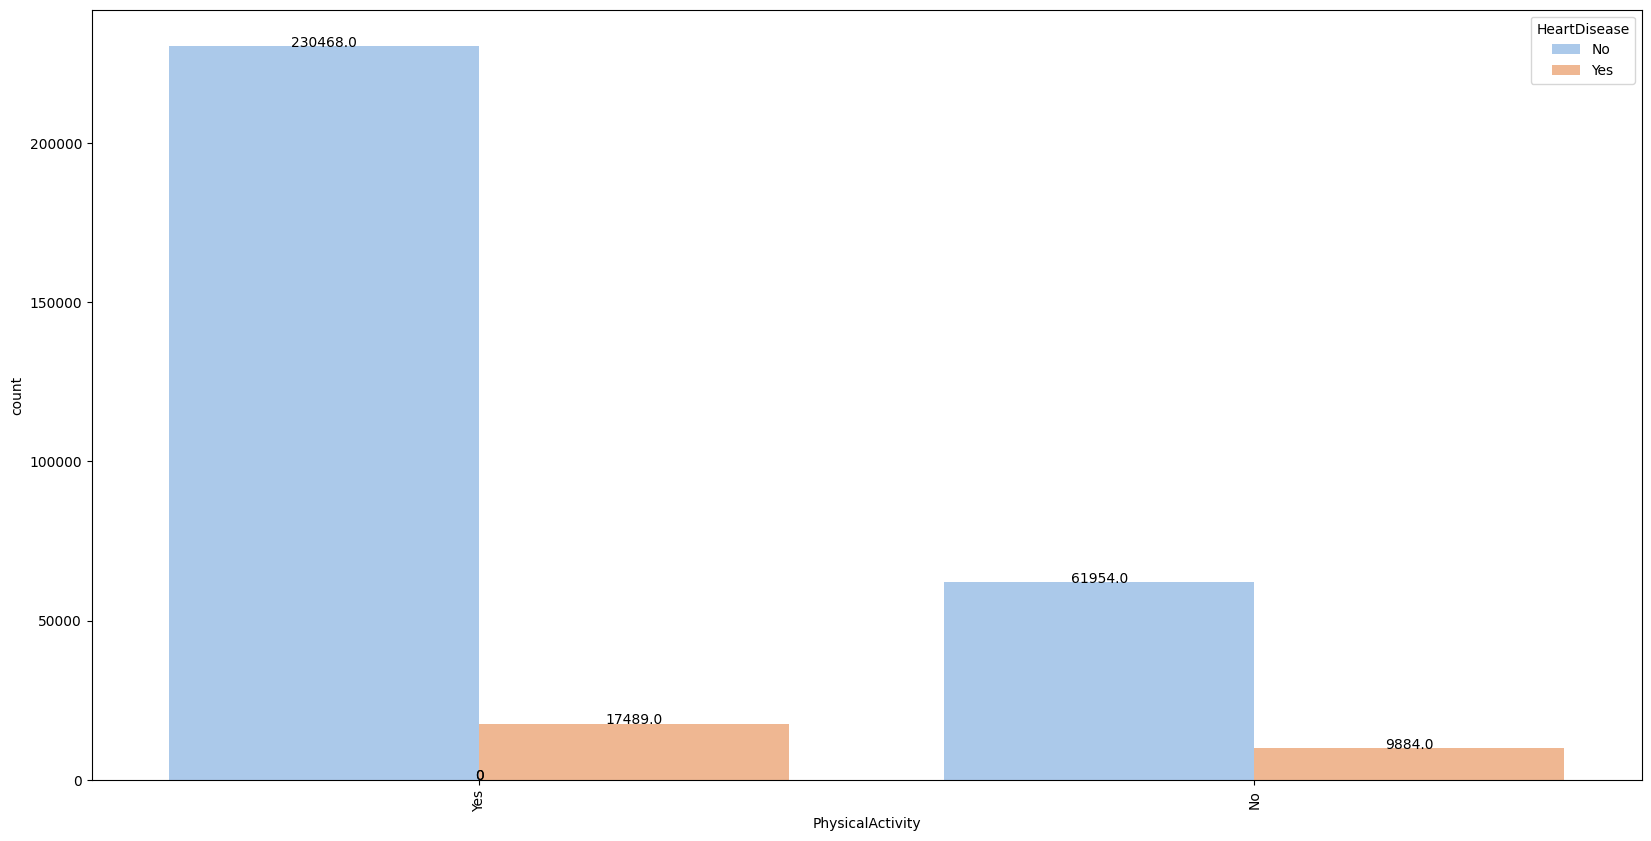

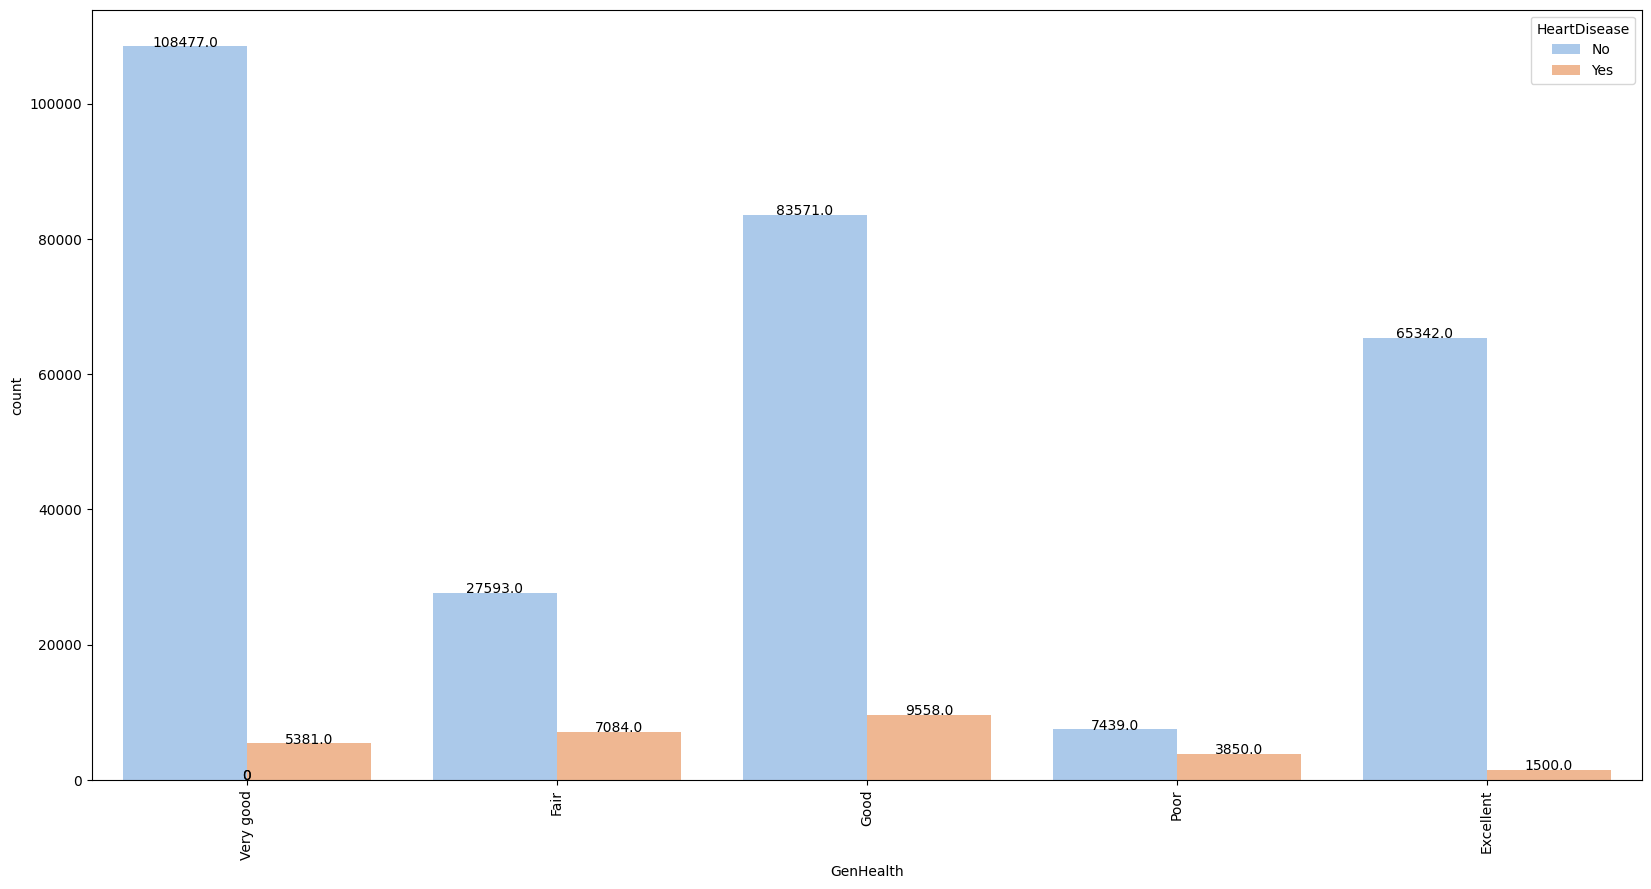

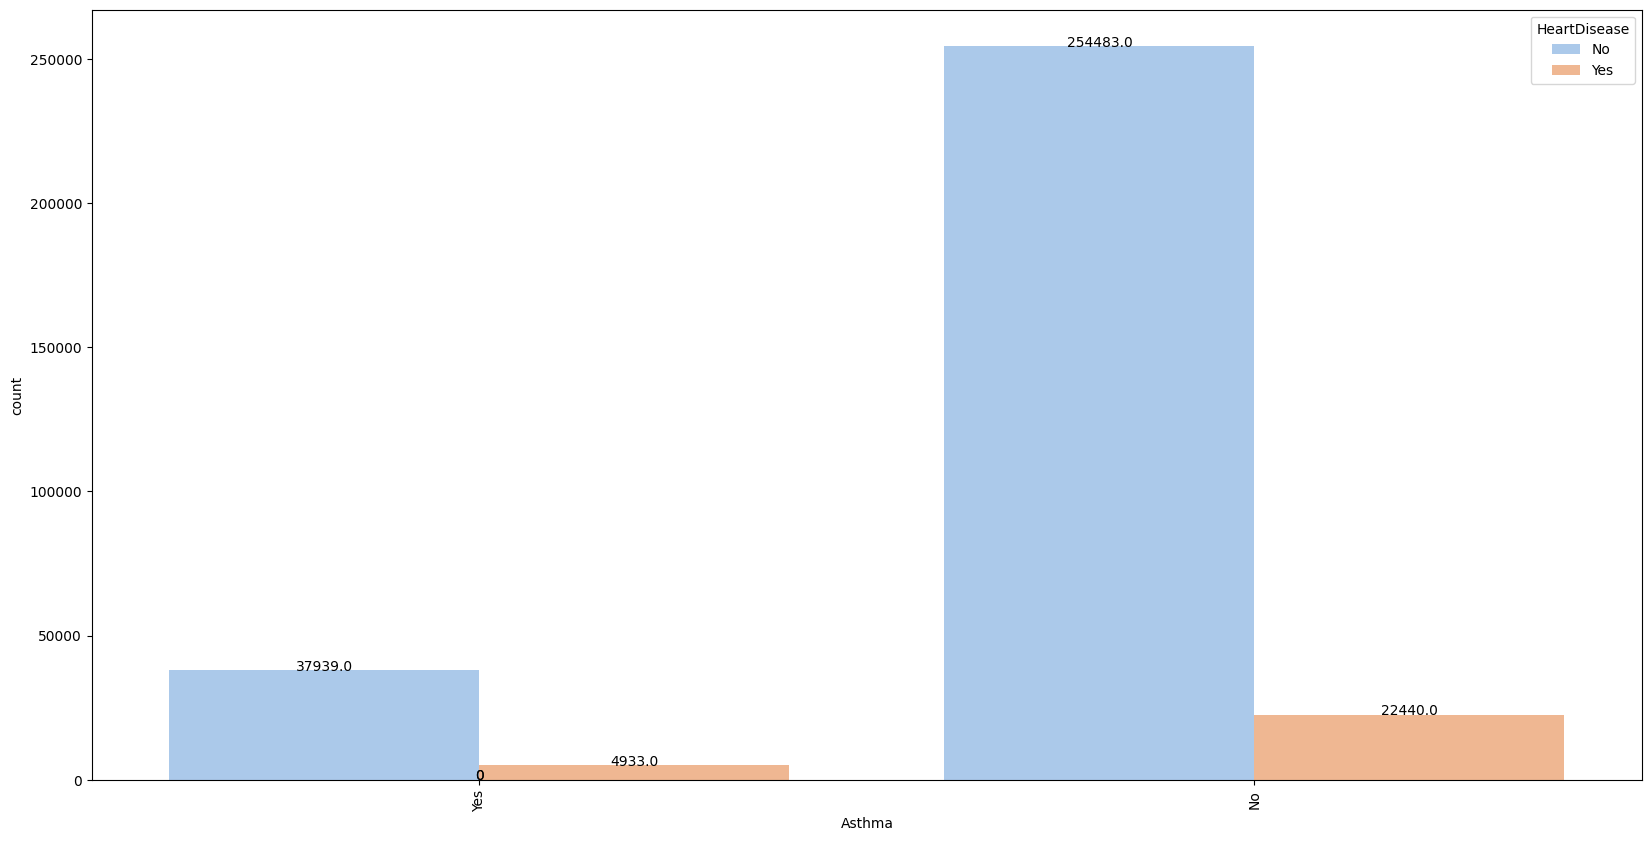

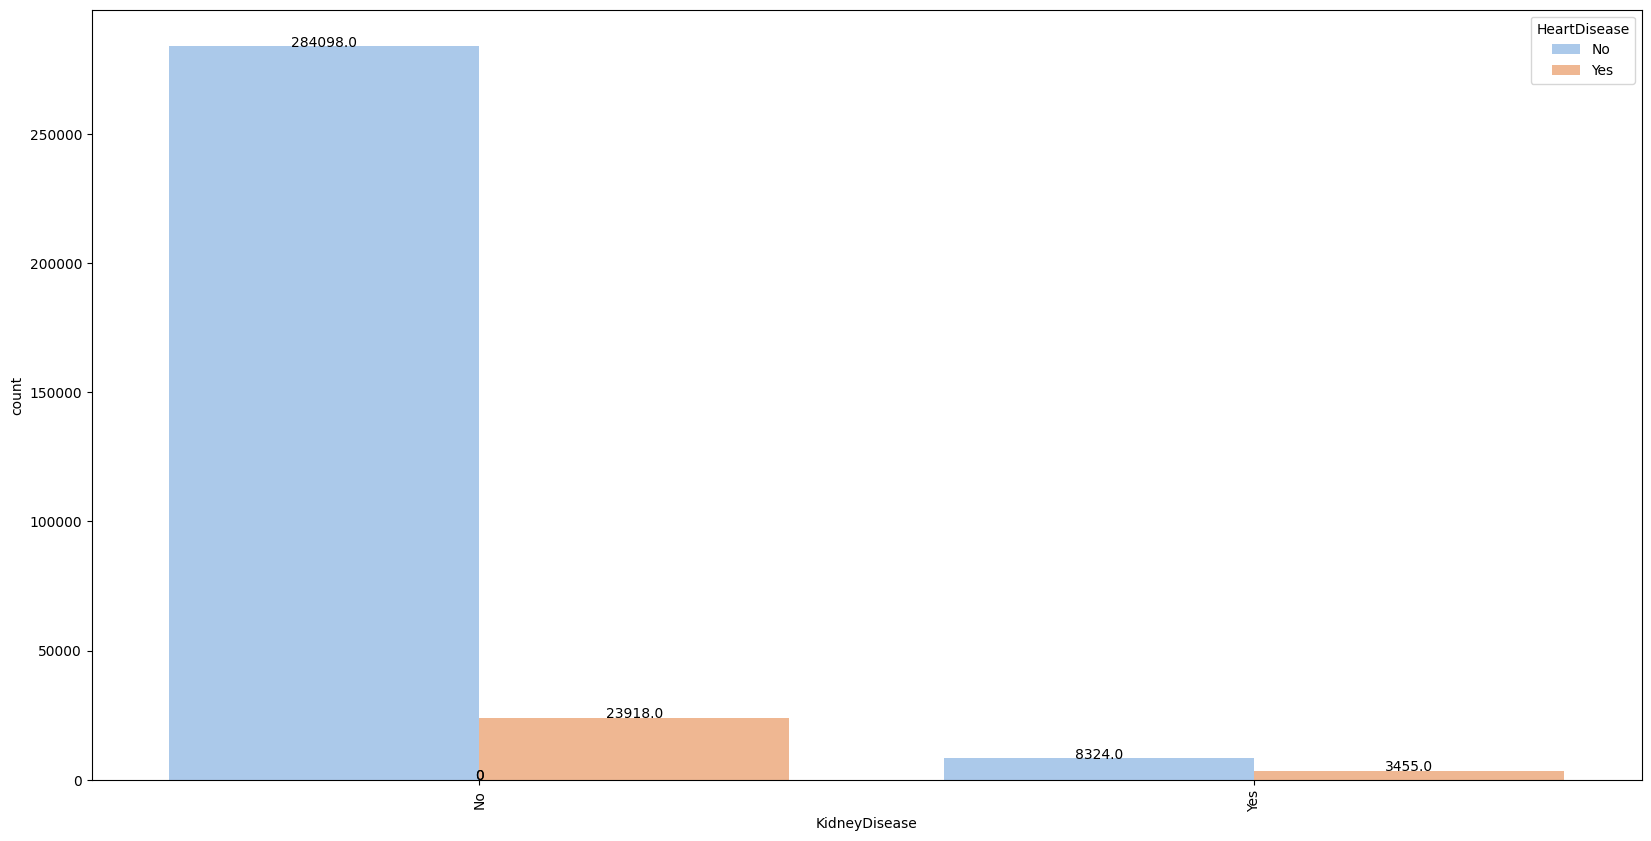

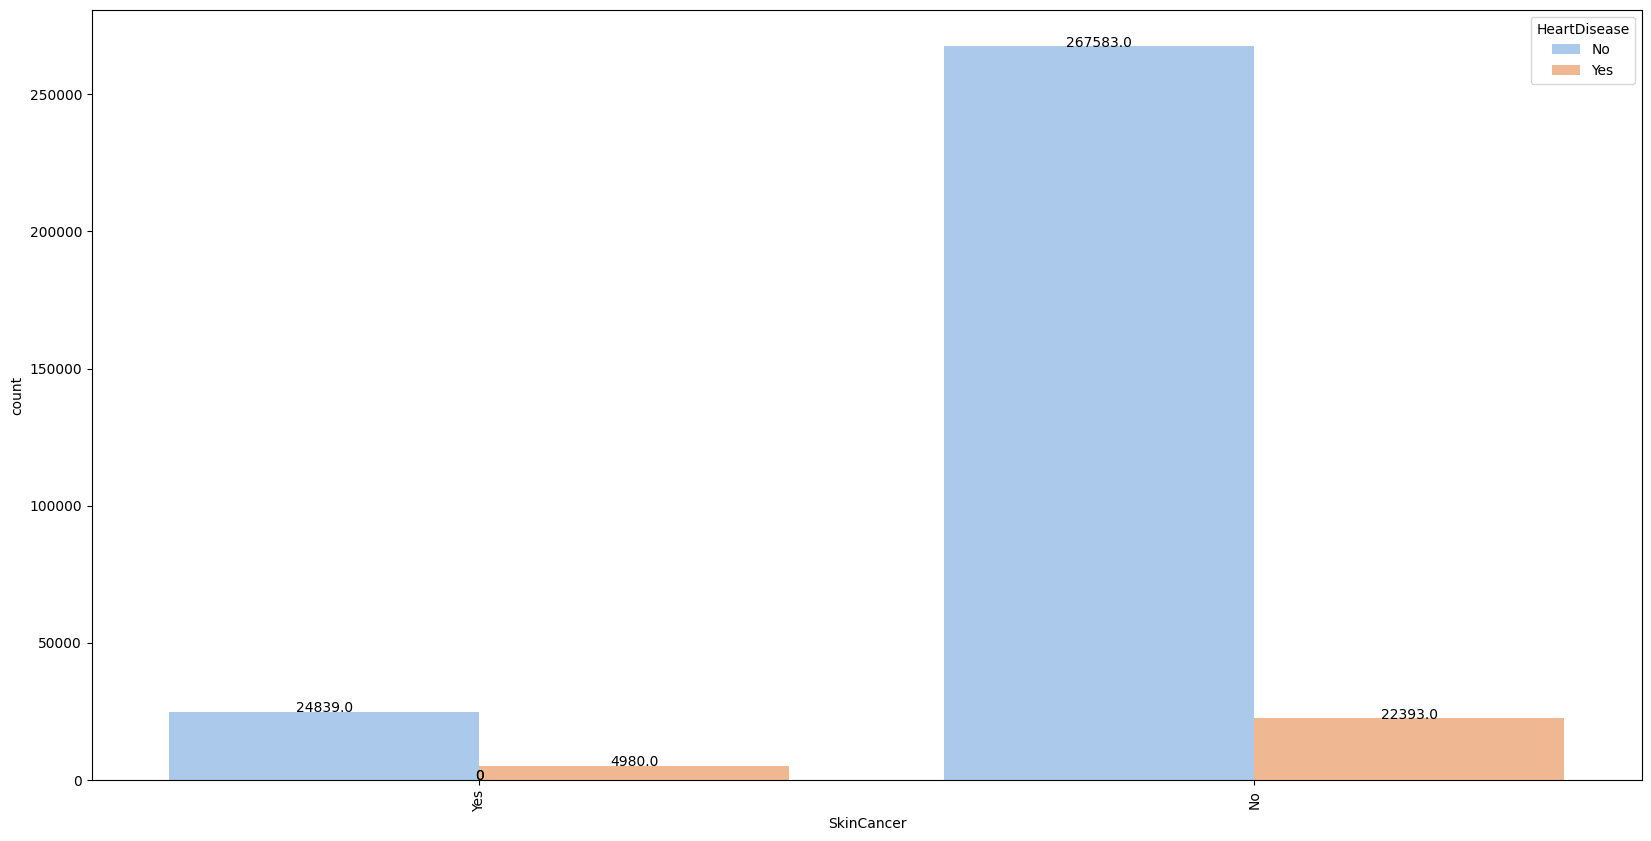

In [11]:
for feature in categorical_features:
  fig, ax1 = plt.subplots(figsize=(20,10))
  graph = sns.countplot(ax=ax1,x = feature , data = train,hue='HeartDisease',palette='pastel')
  graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
  for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

I propose to look at the distribution of categorical variables depending on gender

Let's look at outliers in numerical variables depending on several factors

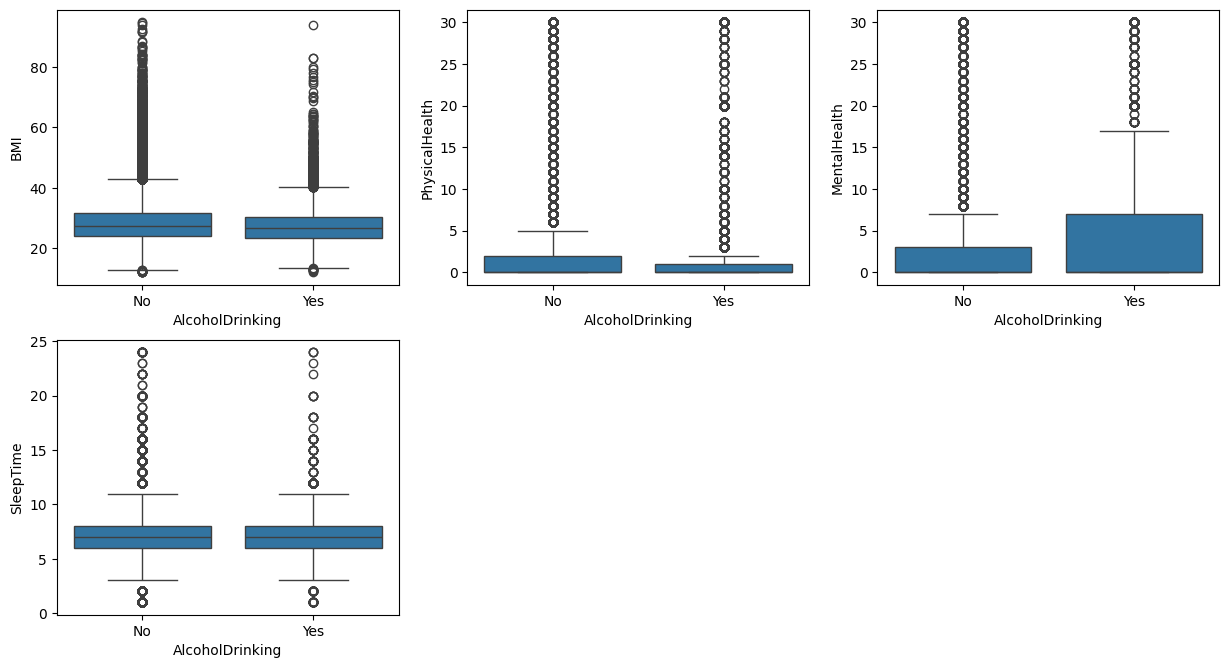

In [12]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature], x = train['AlcoholDrinking'])
    i+=1

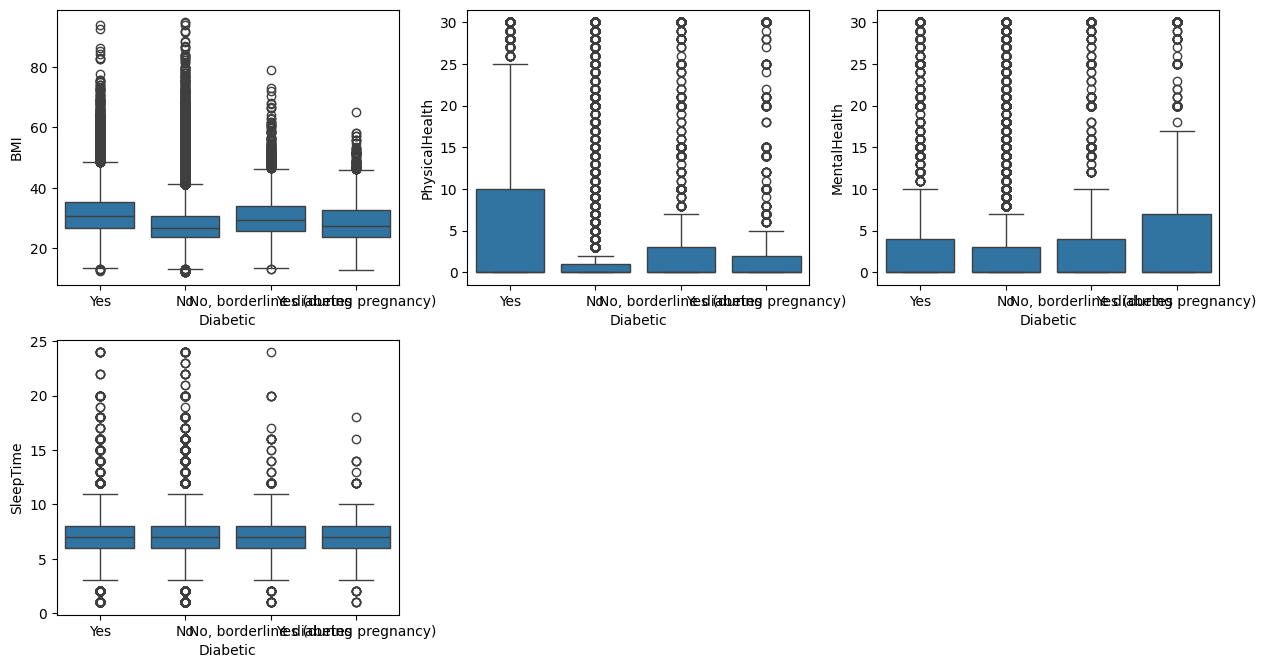

In [13]:
i=1
plt.figure(figsize=(15,25))
for feature in numeric_features:
    plt.subplot(6,3,i)
    sns.boxplot(y=train[feature], x = train['Diabetic'])
    i+=1

From all the graphs presented, it can be concluded that alcohol consumption and smoking are not the main factors in heart disease, as scientists testify to this.

<a id="title-four"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:black'><center>STATISTICAL TESTS</center></h1>

Let's transform our dataset using the OrdinalEncoder method.

In [14]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(train[categorical_features])
train[categorical_features] = enc.transform(train[categorical_features])

Let's carry out the Shapiro-Wilk test to check for the normality of the distribution of numerical variables.

In [15]:
# Shapiro-Wilk Test
from scipy.stats import shapiro
# normality test
for feature in numeric_features:
	stat, p = shapiro(train[feature])
	print('Statistics=%.3f, p=%.3f' % (stat, p))
	# interpret
	alpha = 0.05
	if p > alpha:
		print('Sample looks Gaussian (fail to reject H0)')
	else:
		print('Sample does not look Gaussian (reject H0)')

Statistics=0.928, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.476, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.551, p=0.000
Sample does not look Gaussian (reject H0)
Statistics=0.890, p=0.000
Sample does not look Gaussian (reject H0)


The test for normality has not been passed, therefore, to find the relationship of our variables, it is necessary to use non-parametric tests. Since we mostly have categorical variables, we use Pearson's Chi-square test to check.

The purpose of the test is to determine if two variables are related to each other.

Null hypothesis:
We start by defining the null hypothesis ( H0 ), which states that there is no relationship between the variables.
An alternative hypothesis could argue that there is a significant relationship between the two.

In [16]:
from scipy.stats import chi2_contingency
# defining the table
for feature in categorical_features:
  stat, p, dof, expected = chi2_contingency(pd.crosstab(train[feature],train['HeartDisease']))
# interpret p-value
  alpha = 0.05
  print ( "p value is " + str (p))
  if p<=alpha:
    print ( 'Dependent (reject H0)' )
  else :
    print ( 'Independent (H0 holds true)' )

p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 1.892352227090306e-73
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 2.9886131565632597e-180
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 2.2386144306283177e-121
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)
p value is 0.0
Dependent (reject H0)


In our dataset, there is a statistically significant relationship between the target variable and categorical features. This means that you should try to make a small prediction of the target feature.

Let's build a correlation table

In [17]:
correlation = train.corr()
print(correlation['HeartDisease'].sort_values(ascending = False),'\n')

HeartDisease        1.000000
AgeCategory         0.233432
DiffWalking         0.201258
Stroke              0.196835
PhysicalHealth      0.170721
Diabetic            0.168553
KidneyDisease       0.145197
Smoking             0.107764
SkinCancer          0.093317
Sex                 0.070040
BMI                 0.051803
Asthma              0.041444
Race                0.034854
MentalHealth        0.028591
SleepTime           0.008327
GenHealth          -0.011062
AlcoholDrinking    -0.032080
PhysicalActivity   -0.100030
Name: HeartDisease, dtype: float64 



Index(['HeartDisease', 'AgeCategory', 'DiffWalking', 'Stroke',
       'PhysicalHealth', 'Diabetic', 'KidneyDisease', 'Smoking', 'SkinCancer',
       'Sex', 'BMI', 'Asthma', 'Race', 'MentalHealth', 'SleepTime',
       'GenHealth', 'AlcoholDrinking', 'PhysicalActivity'],
      dtype='object')


<Axes: >

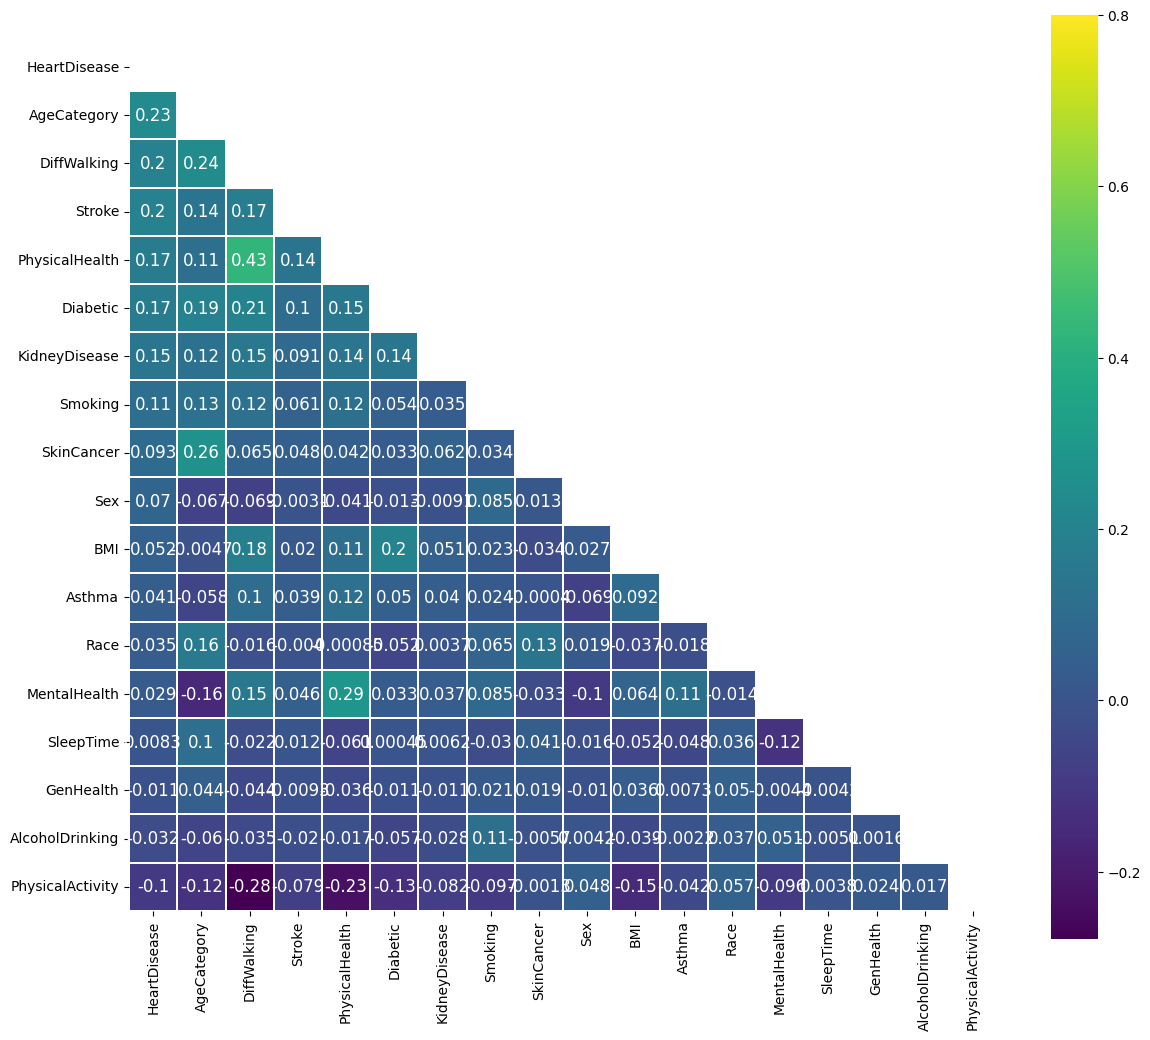

In [18]:
k= 18
cols = correlation.nlargest(k,'HeartDisease')['HeartDisease'].index
print(cols)
cm = np.corrcoef(train[cols].values.T)
mask = np.triu(np.ones_like(train.corr()))
f , ax = plt.subplots(figsize = (14,12))
sns.heatmap(cm,mask=mask, vmax=.8, linewidths=0.01,square=True,annot=True,cmap='viridis',
            linecolor="white",xticklabels = cols.values ,annot_kws = {'size':12},yticklabels = cols.values)

<a id="title-five"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:black'><center>MACHINE LEARNING</center></h1>

In [19]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

In [20]:
y=train['HeartDisease']
train.drop('HeartDisease',axis=1,inplace=True)

In [21]:
X_train, X_test, y_train, y_test=train_test_split(train,y,test_size=0.1,random_state=42)

Let's build simple models and evaluate the quality of their training

In [22]:
models = [KNeighborsClassifier(), LogisticRegression(), XGBClassifier(),ExtraTreesClassifier()]
scores = dict()

for m in models:
    m.fit(X_train, y_train)
    y_pred = m.predict(X_test)

    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission_score: {precision_score(y_test,y_pred)}')
    print(f'Recall_score: {recall_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print('-'*30, '\n')

model: KNeighborsClassifier()
Accuracy_score: 0.9027517198248906
Precission_score: 0.3271428571428571
Recall_score: 0.0798465829846583
F1-score: 0.12836322869955158
------------------------------ 

model: LogisticRegression()
Accuracy_score: 0.9115697310819262
Precission_score: 0.5423728813559322
Recall_score: 0.08926080892608089
F1-score: 0.1532934131736527
------------------------------ 

model: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=na

High accuracy is explained by a large proportion of healthy people. When dealing with imbalanced classes, this metric is useless. More informative metrics are precission,recall. Precision can be interpreted as the proportion of objects called positive by the classifier and at the same time are really positive, and recall shows what proportion of objects of a positive class out of all objects of a positive class the algorithm found. The balance between these two metrics is F1-score. It is the introduction of precision that does not allow us to write all objects into one class, since in this case we get an increase in the False Positive level. Recall demonstrates the algorithm's ability to detect a given class in general, while precision demonstrates the ability to distinguish this class from other classes. To solve our problem, you should choose the algorithm with the highest recall, but the choice of the final algorithm is up to you. It would be possible to search for the optimal hyperparameters of the model, but since Since the problem is exploratory in nature, we will leave the search for hyperparameters for competitions.

<a id="title-six"></a>
<h1 style='background:#4682B4; border:2; border-radius: 10px; color:black'><center>RECOMENDATIONS</center></h1>

10 Essential Measures to Prevent Cardiovascular Disease
1. Healthy nutrition. The composition of the daily diet significantly affects the state of blood vessels and the heart. Frequent and excessive consumption of fatty and fried foods, coffee, chicken eggs, salt and sugar is a sure way to worsen the condition of blood vessels and develop heart attacks, strokes, hypertension and other dangerous ailments.
The increased content of saturated fats, caffeine, salt and sugar increases the level of "bad" cholesterol and blood sugar. Under their influence, atherosclerotic plaques that calcify over time are formed on the vascular walls. There is a narrowing of the lumen of the vessels, leading to their wear. This factor increases the load on the heart, arterial hypertension develops. Hypertension, in turn, leads to the development of many serious diseases that can lead to disability and death.

2. Fighting excess weight. Obesity always increases the risk of vascular and heart pathologies - every extra 10 kg can increase blood pressure by 10-20 mm Hg. Art. All people need to be regularly weighed and have their abdominal circumference measured to determine abdominal obesity.

3. Fight against physical inactivity. Hypodynamia is one of the common causes of diseases of the heart and blood vessels. This is confirmed by the facts about the low physical activity of citizens and the elderly. Remember! Physical activity should be appropriate for age and general health. Be sure to check with your doctor if you have any contraindications for physical education, and what loads are acceptable for you!

4. Giving up bad habits. All studies on the effects of smoking, alcohol and drugs point to one indisputable fact - giving up these bad habits can reduce the risk of heart and vascular diseases by dozens of times. If you cannot get rid of addiction yourself, then to give up addictions, you should use the following methods: to quit smoking - acupuncture, nicotine patches or chewing gums, hypnosis;
to refuse alcohol or drug addiction - a course of treatment and rehabilitation by a professional narcologist.
5. Fighting stress. Frequent stressful situations lead to wear of blood vessels and myocardium. During nervous tension, the level of adrenaline rises. In response to its impact, the heart begins to beat faster, and the vessels are constricted by spasm. As a result, there is a jump in blood pressure, and the myocardium wears out much faster.

6. Self-control of blood pressure and its timely reduction
 An increase in blood pressure leads to the development of coronary artery disease, heart attacks, strokes and other pathologies of the heart and blood vessels. That is why all people should regularly monitor pressure indicators.

7. Systematic preventive examination. Scheduled preventive examination and timely visits to a cardiologist should become the norm for people at risk for the development of pathologies of the heart and blood vessels. The same applies to people who report an increase in blood pressure when measured independently. Do not neglect the recommendations of your doctor!


8. Controlling blood cholesterol levels
It is necessary to start annually to control the level of cholesterol in the blood after 30 years. In healthy people, its level should not exceed 5 mmol / l, and in patients with diabetes - 4-4.5 mmol / l.

9. Blood sugar control
It is necessary to start monitoring blood sugar levels annually after 40-45 years. Its level should not exceed 3.3-5.5 mmol / l (in the blood from a finger), 4-6 mmol / l (in the blood from a vein).

10. Taking blood thinners
For people at risk, a cardiologist may recommend taking blood thinners. The choice of the drug, its dose, the duration of the course of administration is determined only by the doctor, guided by the data of analyzes and other examinations.

* Compliance with these rules for the prevention of cardiovascular diseases will significantly reduce the risk of their development. Remember this and be healthy!